In [4]:
from dendropy import TaxonNamespace, Tree, TreeList, Node
import dendropy
import numpy as np
from io import StringIO
from Bio import Phylo
from dendropy.calculate import treemeasure as tm

In [2]:


# generate the Newick string

def avendesora(x):
    """
    Starts tree simulation with newick format
    with random branch length:
    (A,(B,C);)
    
    Parameters:
    x(int): number of banches
    
    Returns:
    taxa(list): 
    dend(list):
    nwk(list):
    io(list)
    """
    taxa=[]
    verts=[]
    lens=np.linespace(1/x,1,x)
    bifurcation_point = 1
    for i in range(0,x):
        taxa.append("s"+str(i))
    tns = TaxonNamespace(taxa)
    tree = Tree(taxon_namespace=tns)
    for i in range(0,x):
        if i < 2:
            verts.append(tree.seed_node.new_child(edge_length=lens.max()))
            verts[i].taxon 
        elif i == 2:
            vert[i-1].edge.length = lens[i-2]
            verts[i] = dendropy.Node(edge_length=np.random.uniform(0,1))
            verts[i+1] = dendropy.Node(edge_length=np.random.uniform(0,1))
            verts[i-1].set_child_nodes([verts[i], verts[i+1]])
            
        print(tree.as_ascii_plot())

In [5]:
x = 4
taxa=[]
verts=[]
lens = []
lens = np.linspace(1/(x-1),1,(x-1))

for i in range(0,x):
    taxa.append("s"+str(i))

tns = TaxonNamespace(taxa)
tree = Tree(taxon_namespace=tns)

lens 

array([0.33333333, 0.66666667, 1.        ])

In [6]:
for i in range(0,x):
        if i < 2:
            verts.append(tree.seed_node.new_child(edge_length=lens.max()))
            verts[i].taxon 
        elif i == 2:
            verts[i-1].edge.length = lens[0]
            verts.append(Node(edge_length=np.random.uniform(0,1-lens[0])))
            verts.append(Node(edge_length=1-lens[0]))
            verts[i-1].set_child_nodes([verts[i], verts[i+1]])
        elif i > 2: 
            verts


In [7]:
verts[0].taxon = tns.get_taxon("s0")
verts[2].taxon = tns.get_taxon("s1")
verts[3].taxon = tns.get_taxon("s2")

In [8]:
for i, node in enumerate(tree.leaf.iter()):
    node.taxon = tns.get_taxon[i]

AttributeError: 'Tree' object has no attribute 'leaf'

(s0:1.0,(s1:0.0005212625916630743,s2:0.6666666666666667):0.3333333333333333);



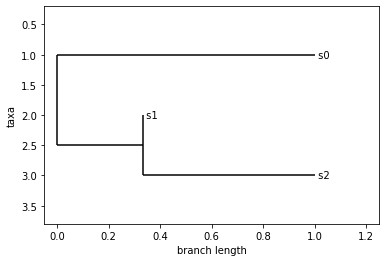

In [9]:
print(tree.as_string(schema="newick"))
Phylo.draw(Phylo.read(StringIO(str(tree.as_string(schema="newick"))), "newick"))

In [ ]:
s = StringIO(str(tree.as_string(schema="newick")))
tree = Phylo.read(s, "newick")
Phylo.draw(tree)

In [15]:
import random

def generate_imbalanced_trees(n, x):
    trees = []
    for i in range(n):
        # Generate a starting tree with equal branch lengths and random topology
        taxa = [chr(ord('A') + j) for j in range(x)]
        random.shuffle(taxa)
        tree = str("({});").format(",".join(taxa))
        trees.append(tree)
        
        # Make the tree more imbalanced by randomly selecting nodes and increasing their branch lengths
        while True:
            node = random.choice(taxa)
            if node == taxa[0]:
                break
            branch_length = random.uniform(0.1, 1.0)
            parent = random.choice([t for t in taxa if t != node])
            tree = tree.replace("({},{})".format(node, parent), "({}:{},{})".format(node, branch_length, parent))
            taxa.remove(node)
            taxa.insert(0, node)
        
        # Add the final tree to the list
        trees[i] = tree
    
    return trees


In [16]:
n = 10
x = 24
trees = generate_imbalanced_trees(n, x)
for i in trees:
   print(i)

(C,D,O,M,U,N,A,F,J,W,B,E,R,K,V,P,I,T,X,Q,S,H,L,G);
(M,R,W,I,B,V,S,C,O,F,N,E,D,J,Q,T,X,A,L,U,G,K,H,P);
(O,N,I,D,B,L,U,H,W,E,X,J,A,V,G,P,F,T,K,Q,S,R,M,C);
(U,P,O,S,T,L,Q,V,M,G,E,R,H,X,W,I,D,F,J,K,B,C,A,N);
(W,N,Q,C,U,R,H,P,B,A,L,G,I,O,D,K,T,V,E,F,J,M,S,X);
(V,G,J,B,F,P,M,I,N,Q,W,O,D,C,L,T,E,A,U,X,K,R,H,S);
(O,U,J,S,M,R,G,N,I,A,P,F,V,T,X,B,C,Q,E,W,H,D,L,K);
(G,R,K,Q,S,E,L,C,W,T,F,I,M,N,A,X,J,D,B,H,U,O,P,V);
(K,P,O,F,A,S,M,G,N,I,X,E,V,W,R,Q,B,J,L,C,D,T,H,U);
(F,C,J,B,A,S,V,L,Q,I,D,X,E,P,U,N,G,H,K,O,T,R,M,W);


In [23]:
taxon_namespace = dendropy.TaxonNamespace(["A", "B", "C", "D",])
tree = dendropy.Tree(taxon_namespace=taxon_namespace)
ch1 = tree.seed_node.new_child()
ch1.edge.length = 1
ch2 = tree.seed_node.new_child(edge_length=1)
ch3 = dendropy.Node(edge_length=1)
ch4 = dendropy.Node(edge_length=2)
ch1.add_child(ch3)
ch1.add_child(ch4)
ch5 = dendropy.Node(edge_length=1)
ch6 = dendropy.Node(edge_length=2)
ch3.taxon = taxon_namespace.get_taxon("A")
ch4.taxon = taxon_namespace.get_taxon("B")
ch5.taxon = taxon_namespace.get_taxon("C")
ch6.taxon = taxon_namespace.get_taxon("D")
tree.as_string(schema="newick")
# results in newick string:
# ((A:1,B:2):1,(C:1,D:2):1);

NameError: name 'dendropy' is not defined

In [10]:
def generate_imbalanced_trees(taxa, num):
    taxon_namespace = TaxonNamespace(["s" + str(i) for i in range(1, taxa + 1)])

    trees = []
    for i in range(num):
        tree = Tree(taxon_namespace=taxon_namespace)
        nodes = [tree.seed_node]
        for j in range(taxa - 1):
            node = nodes.pop(0)
            ch1 = node.new_child(edge_length=1)
            ch2 = node.new_child(edge_length=i + 1)
            nodes.extend([ch1, ch2])

        for idx, taxon in enumerate(taxon_namespace):
            nodes[idx].taxon = taxon

        newick_str = tree.as_string(schema="newick")
        trees.append(newick_str.rstrip())

    return trees



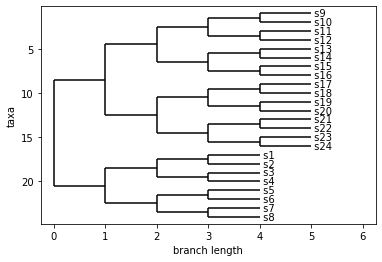

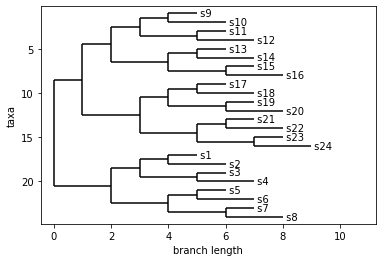

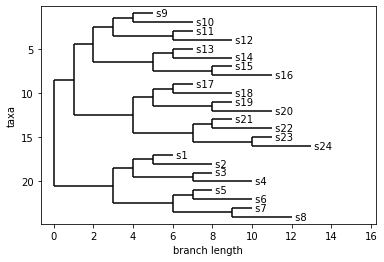

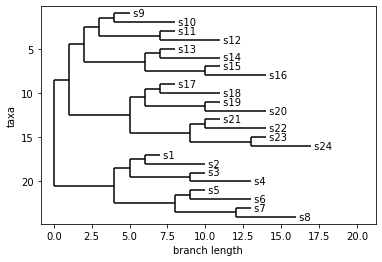

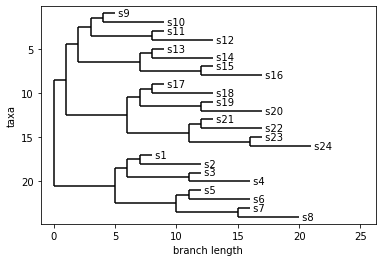

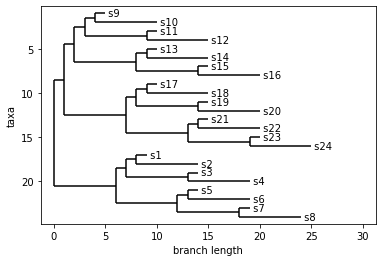

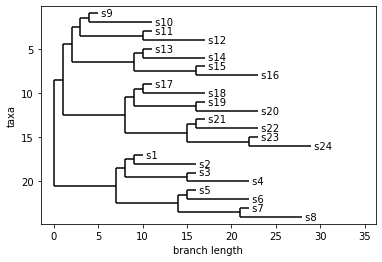

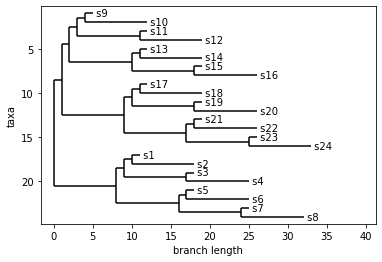

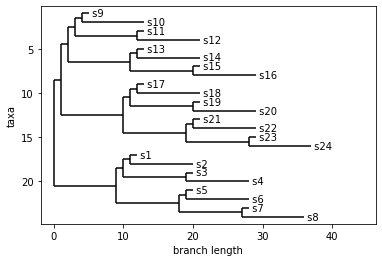

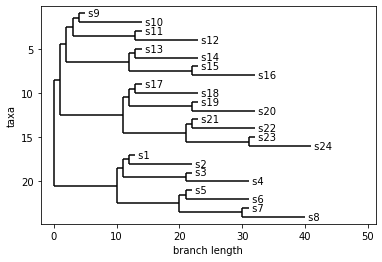

In [11]:
taxa = 24
num = 10
output = generate_imbalanced_trees(taxa, num)

for i in range(0,num):
    s = Phylo.read(StringIO(output[i]), "newick")
    Phylo.draw(s)


In [13]:
    for i in range(0, num):
        s = output[i].rstrip("'").lstrip("'")
        s = dendropy.Tree.get(data = s, schema="newick")
        print(tm.sackin_index(s))

4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
